# Project: Investigate a Dataset
## Dataset: No Show Appointments in Brazil

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
> <li><a href="#characteristics">Patient Characteristics</a></li>
> <li><a href="#gender">Gender</a></li>
> <li><a href="#age/gender">Age/Gender</a></li>
> <li><a href="#hospital_loc">Hospital Location</a></li>     
<li><a href="#conclusions">Conclusions</a></li>
<ul>

<a id='intro'></a>
## Introduction

> The dataset that I've selected for analysis is the 'No Show Appointments in Brazil.' After looking at the dataset, I am wondering what factors will affect a person for not showing up to their appointment? Age/Gender, location of hosptial, enrolled in Bosla Familia(welfare program), characteristics of patients(diabetic, hypertention, etc.), and if they received a text message reminder. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
% matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

> First I will be looking at the data to evaulate what steps I should take next. 

### General Properties

In [7]:
df = pd.read_csv("/Users/wilbertrivera/desktop/noshow.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.shape

(110527, 14)

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


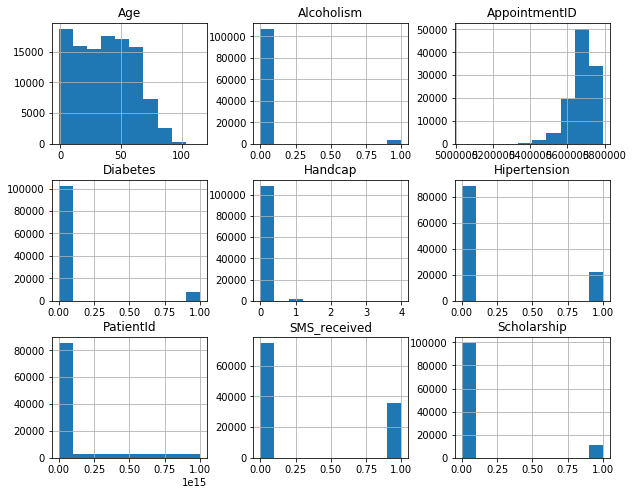

In [10]:
df.hist(figsize=(10,8));

### Data Cleaning (Notes)

>After looking at the histogram of the dataset, I can see that age is evenly distributed. Roughly about 40% of the people who scheduled an appointment recieved a text message. The patient's with diabetes, hyptertension, handicap, and alcoholism make a small percentage of the population. Patients on scholarship(enrolled Bosla Familia) in  make of about 10% of the population. 

> I will need to rename some columns because of misspellings and drop columns that I find provide meaninful impact on my investigation. Find out if there are nulls and replacing them with the mean of the column. Find out if there are duplicates and dropping them. As I explore that dataset, I might find more errors and will fix as them as I go along. 

In [11]:
df.drop(['AppointmentID'], axis=1, inplace=True)


## Notes 
>I don't see the value of AppointmentID.. I decided to drop these columns.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


## Notes 
>Looking over the data I can see that PatientId is a float, but most of the variables in that column are integers. I'm going to see if this might be an error and if so correct it. 


In [13]:
pd.set_option('display.max_colwidth', 2)

In [14]:
df['PatientId'] = df['PatientId'].astype(int)

In [15]:
df['PatientId'].head()

0    29872499824296 
1    558997776694438
2    4262962299951  
3    867951213174   
4    8841186448183  
Name: PatientId, dtype: int64

## Notes
> Converted all floats to integers for consistency. There was a mixture of floats and integers, but there was nothing after the decimal point. 


In [16]:
df.isnull().sum()

PatientId         0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [17]:
df.duplicated

<bound method DataFrame.duplicated of               PatientId Gender          ScheduledDay        AppointmentDay  \
0       29872499824296   F      2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   
1       558997776694438  M      2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   
2       4262962299951    F      2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   
3       867951213174     F      2016-04-29T17:29:31Z  2016-04-29T00:00:00Z   
4       8841186448183    F      2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   
5       95985133231274   F      2016-04-27T08:36:51Z  2016-04-29T00:00:00Z   
6       733688164476661  F      2016-04-27T15:05:12Z  2016-04-29T00:00:00Z   
7       3449833394123    F      2016-04-27T15:39:58Z  2016-04-29T00:00:00Z   
8       56394729949972   F      2016-04-29T08:02:16Z  2016-04-29T00:00:00Z   
9       78124564369297   F      2016-04-27T12:48:25Z  2016-04-29T00:00:00Z   
10      734536231958495  F      2016-04-27T14:58:11Z  2016-04-29T00:00:00Z   
11      7542951368435    M

In [18]:
df.drop_duplicates(inplace=True)

### Notes 
>I dropped the duplicates, to clean up the data. 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109909 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         109909 non-null int64
Gender            109909 non-null object
ScheduledDay      109909 non-null object
AppointmentDay    109909 non-null object
Age               109909 non-null int64
Neighbourhood     109909 non-null object
Scholarship       109909 non-null int64
Hipertension      109909 non-null int64
Diabetes          109909 non-null int64
Alcoholism        109909 non-null int64
Handcap           109909 non-null int64
SMS_received      109909 non-null int64
No-show           109909 non-null object
dtypes: int64(8), object(5)
memory usage: 11.7+ MB


In [20]:
df.rename(columns={'No-show': 'No_show', 'Hipertension': 'Hypertension', 'Scholarship': 'Enrolled', 'Neighbourhood': 'Hospital_loc', 'Handcap': 'Handicap'}, inplace=True)

## Notes
>Decided to rename the columns because of grammatical errors and to make it easier to understand and read. 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109909 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         109909 non-null int64
Gender            109909 non-null object
ScheduledDay      109909 non-null object
AppointmentDay    109909 non-null object
Age               109909 non-null int64
Hospital_loc      109909 non-null object
Enrolled          109909 non-null int64
Hypertension      109909 non-null int64
Diabetes          109909 non-null int64
Alcoholism        109909 non-null int64
Handicap          109909 non-null int64
SMS_received      109909 non-null int64
No_show           109909 non-null object
dtypes: int64(8), object(5)
memory usage: 11.7+ MB


In [22]:
df['Gender'].replace({'F': 'Female', 'M':'Male'}, inplace=True)


## Notes
>I replaced F with Female and M with Male. The reason I replaced them was becuase it's easier to read/undestand. 

In [23]:
df_a = df[df['No_show'] == 'Yes']


In [24]:
df_a.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Hospital_loc,Enrolled,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
6,733688164476661,Female,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,Female,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7542951368435,Male,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,14794966191172,Female,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,622257462899397,Female,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


## Notes
> I will need to create a new dataset that just includes patient's who are no shows. This will allow me to explore the dataset and find out why might be the correlation for them not showing up. 

<a id='eda'></a>
## Exploratory Data Analysis
<a id='characteristics'></a>
### Research Question 1 
Is there a correlation with a patient's characteristics (age, alcholism, diabetes, handicap, hypertension) and being a no show?

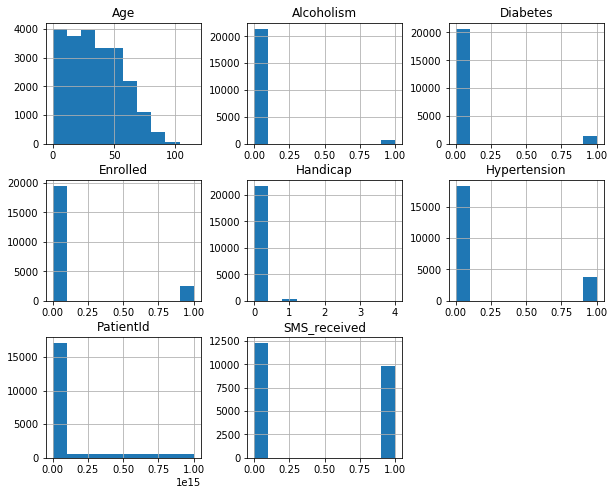

In [25]:
df_a.hist(figsize=(10,8));


## Notes
>My initial belief was that a patient's characteristics (age, handicap, hyptertension, diabetes, alcoholism) might be a factor, but the histogram is similiar to the previous dataset. Half the patient's that didn't show up recieved a text message reminder, and it doesn't seem to make an impact. Being enrolled or not in Bosla Familia (welfare program) seems to show the same results. 

> I will need to explore theis dataset further. I will focus my attention to see if there is any correlation with gender specifically, age/gender, apppointment day, and the location of the hospital that affects no shows. I suspect that it might be the location of the hospital that might have a correlation. 

<a id='gender'></a>
### Research Question 2  
Does gender have any correlation with being a no show?

In [26]:
gender_counts = df_a['Gender'].value_counts()
gender_counts 

Female    14458
Male      7647 
Name: Gender, dtype: int64

## Notes
>I want to breakdown the gender count by proportion. In order to do that I need the Female and Male counts first. 

In [27]:
gender_total_count = df_a['Gender'].value_counts().sum()
gender_total_count

22105

## Notes
>In order to get proportion I will need to sum up the total of the column 'Gender'. 

In [28]:
proportion_gender_noshow = gender_counts/gender_total_count
proportion_gender_noshow

Female    0.65406
Male      0.34594
Name: Gender, dtype: float64

## Notes
>In order to get proprotion I need to divide the female sum value and the male sum vale with the total value. 

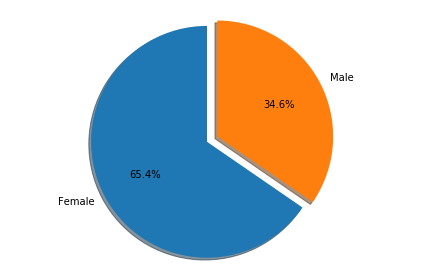

In [29]:
# Pie chart
labels = ['Female', 'Male']
sizes = [proportion_gender_noshow['Female'], proportion_gender_noshow['Male']]
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout();


## Notes
> I will include to see the patient's that did not no show up to the overall dataset that is all encompassing to see if there is a difference. 

In [30]:
gender_count_overall = df['Gender'].value_counts()
gender_count_overall

Female    71424
Male      38485
Name: Gender, dtype: int64

## Notes
>In order to get proportion I need to sum up the total of the column 'Gender'. 

In [31]:
gender_count_overall_total = df['Gender'].value_counts().sum()
gender_count_overall_total

109909

## Notes
>In order to get proportion I need to divide the female sum value and male sum value with the total value. 

In [32]:
pro__gender_noshow_overall = gender_count_overall/gender_count_overall_total
pro__gender_noshow_overall

Female    0.649847
Male      0.350153
Name: Gender, dtype: float64

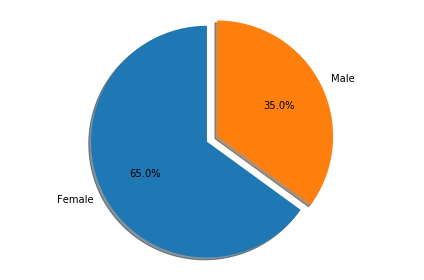

In [33]:
# Pie chart
labels = ['Female', 'Male']
sizes = [pro__gender_noshow_overall['Female'], pro__gender_noshow_overall['Male']] 
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()


### NOTES

> After seeing the overall gender data, proportionally both datasets are about the same, so there is not a direct correlation. 

<a id='age/gender'></a>
### Research Question 3 
Is there a correlation between no shows and age/gender? 

In [34]:
df_a['Age'].value_counts()

0      636
1      415
17     394
19     389
30     362
9      360
20     353
16     351
21     350
25     349
22     348
18     347
33     344
23     341
36     339
39     337
28     332
27     327
29     327
32     321
15     320
34     320
38     320
5      319
24     318
44     316
8      315
14     314
31     314
53     314
      ... 
69     116
72     100
73     96 
70     94 
76     91 
78     89 
74     89 
80     79 
77     78 
75     77 
82     66 
81     62 
83     60 
79     60 
85     49 
86     38 
84     35 
89     29 
87     27 
90     23 
92     18 
91     13 
88     12 
93     10 
94     6  
95     6  
97     2  
115    2  
96     1  
98     1  
Name: Age, Length: 100, dtype: int64

In [47]:
df_a['Age_group'] = (
    df_a['Age'].apply(lambda x: min(int(x / 10) , 9)))
df_a['Age_group'].value_counts()

/Users/wilbertrivera/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    3463
2    3354
3    3255
1    3231
4    2847
5    2745
6    1776
7    895 
8    457 
9    82  
Name: Age_group, dtype: int64

## Notes 
> I categorized the data into 9 columns, each in increments of 10. If the age was over 100 then it was categorized
within the last column(9).

In [48]:
df_ag = df_a.groupby(['Age_group'])



## Notes
> I used groupby to group the age groups together to better understand the information according to each age group. 

In [49]:
df_ag_counts = df_ag['Gender'].value_counts()


## Notes 
>After grouping them together by age groups I wanted to specifically look at the female and male count to see how they are distributed. 

In [50]:
df_ag_total = df_ag['Gender'].value_counts().sum()

## Notes
> While seeing the number counts of each sex and category is beneficial, I will need to look at it proportionally. 
I will need to divide the value counts by the total sum. 

In [51]:
df_ag_por = df_ag_counts/df_ag_total 


In [52]:
df_ag_por

Age_group  Gender
0          Male      0.082425
           Female    0.074237
1          Female    0.087084
           Male      0.059082
2          Female    0.113549
           Male      0.038181
3          Female    0.103777
           Male      0.043474
4          Female    0.090342
           Male      0.038453
5          Female    0.084687
           Male      0.039493
6          Female    0.056729
           Male      0.023615
7          Female    0.027234
           Male      0.013255
8          Female    0.013662
           Male      0.007012
9          Female    0.002760
           Male      0.000950
Name: Gender, dtype: float64

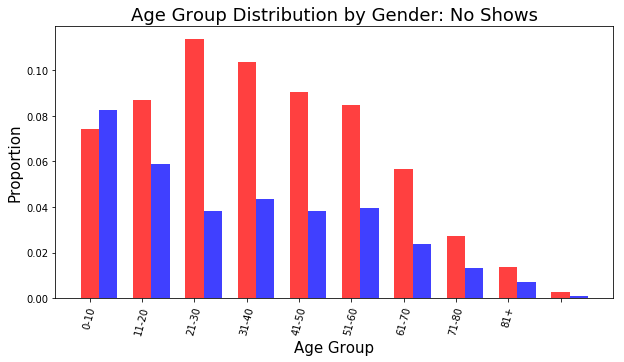

In [53]:
indexa = np.arange(len(df_ag)) 
width = 0.35 
plt.figure(figsize=(10,5))

# plot bars
female_por = [0.074237, 0.087084, 0.113549, 0.103777, 0.090342, 0.084687, 0.056729, 0.027234, 0.013662, 0.002760]
male_por = [0.082425, 0.059082, 0.038181, 0.043474, 0.038453, 0.039493, 0.023615, 0.013255, 0.007012, 0.000950]
Female_no_show = plt.bar(indexa, female_por, width, color='r', alpha=.75, label='RCities')
Male_no_show = plt.bar(indexa + width, male_por, width, color='b', alpha=.75, label='RCities')

labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']  # xtick labels
# title and labels
plt.ylabel('Proportion', fontsize=15)
plt.xlabel('Age Group', fontsize=15)
plt.title('Age Group Distribution by Gender: No Shows', fontsize=18)
plt.xticks(indexa, labels, fontsize=10, rotation=75);

In [54]:
df['Age_group'] = (
    df['Age'].apply(lambda x: min(int(x / 10) , 9)))
df['Age_group'].value_counts()

0    17414
5    15763
3    15049
4    14132
2    13617
1    12854
6    11828
7    5910 
8    2929 
9    413  
Name: Age_group, dtype: int64

In [55]:
df_ag_total = df.groupby(['Age_group'])


In [56]:
df_ag_total_counts = df_ag_total['Gender'].value_counts()


In [57]:
df_ag_total_sum = df_ag_total['Gender'].value_counts().sum()

In [58]:
df_por_total = df_ag_total_counts/df_ag_total_sum 


In [59]:
df_por_total

Age_group  Gender
0          Male      0.083178
           Female    0.075262
1          Female    0.070358
           Male      0.046593
2          Female    0.091649
           Male      0.032245
3          Female    0.097144
           Male      0.039778
4          Female    0.088355
           Male      0.040224
5          Female    0.097635
           Male      0.045783
6          Female    0.072988
           Male      0.034629
7          Female    0.035784
           Male      0.017988
8          Female    0.018033
           Male      0.008616
9          Female    0.002639
           Male      0.001119
Name: Gender, dtype: float64

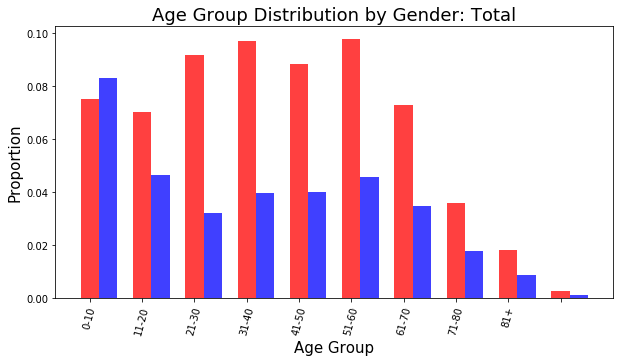

In [60]:
indexb = np.arange(len(df_ag)) 
width = 0.35 
plt.figure(figsize=(10,5))

# plot bars
female_por_total = [0.075262, 0.070358, 0.091649, 0.097144, 0.088355, 0.097635, 0.072988, 0.035784, 0.018033, 0.002639]
male_por_total = [0.083178, 0.046593, 0.032245, 0.039778, 0.040224, 0.045783, 0.034629, 0.017988, 0.008616, 0.001119]
Female_no_show = plt.bar(indexb, female_por_total, width, color='r', alpha=.75, label='RCities')
Male_no_show = plt.bar(indexb + width, male_por_total, width, color='b', alpha=.75, label='RCities')

labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']  # xtick labels
# title and labels
plt.ylabel('Proportion', fontsize=15)
plt.xlabel('Age Group', fontsize=15)
plt.title('Age Group Distribution by Gender: Total', fontsize=18)
plt.xticks(indexa, labels, fontsize=10, rotation=75);

## Notes
>Overall, it seems that comparing patient's overall vs patient's with no shows, shows a skew to the right. That should be expected as the demographics for the older age groups tends to decline over time. This information will need to be further anaylzed, possibly with statistical modeling.

<a id='hospital_loc'></a>
### Research Question 4 
Does the location of the hosptial have an impact on a patient being a no show? 

In [61]:
No_show_loc = df_a['Hospital_loc'].value_counts()
No_show_loc

JARDIM CAMBURI                 1429
MARIA ORTIZ                    1219
ITARARÉ                        902 
RESISTÊNCIA                    885 
CENTRO                         695 
JESUS DE NAZARETH              695 
JARDIM DA PENHA                631 
CARATOÍRA                      583 
TABUAZEIRO                     568 
BONFIM                         548 
ILHA DO PRÍNCIPE               532 
SÃO PEDRO                      510 
SANTO ANDRÉ                    504 
ANDORINHAS                     497 
SANTA MARTHA                   489 
SANTO ANTÔNIO                  478 
ROMÃO                          465 
GURIGICA                       454 
JABOUR                         451 
DA PENHA                       428 
SÃO JOSÉ                       427 
MARUÍPE                        420 
NOVA PALESTINA                 402 
BELA VISTA                     380 
SANTOS DUMONT                  368 
SÃO CRISTÓVÃO                  362 
ILHA DE SANTA MARIA            361 
FORTE SÃO JOÃO              

## Notes
>There does seem to be hospitals that have a disportion amount of no shows in certain locations
I will need to explore this further by seeing the total numbers from the overall dataset. 

In [62]:
Total_hos_loc = df['Hospital_loc'].value_counts()
Total_hos_loc

JARDIM CAMBURI                 7621
MARIA ORTIZ                    5804
RESISTÊNCIA                    4387
JARDIM DA PENHA                3873
ITARARÉ                        3470
CENTRO                         3310
TABUAZEIRO                     3123
SANTA MARTHA                   3103
JESUS DE NAZARETH              2852
BONFIM                         2761
SANTO ANTÔNIO                  2733
SANTO ANDRÉ                    2556
CARATOÍRA                      2541
JABOUR                         2507
SÃO PEDRO                      2432
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2263
DA PENHA                       2203
ROMÃO                          2197
ANDORINHAS                     2194
GURIGICA                       2014
SÃO JOSÉ                       1963
BELA VISTA                     1894
MARUÍPE                        1891
ILHA DE SANTA MARIA            1885
FORTE SÃO JOÃO                 1867
SÃO CRISTÓVÃO                  1831
REDENÇÃO                    

## Notes 
There does seem to be a correlation with the location of the hosptial and being a no show. I will need to look at it proportionally. Some hosptials, due to their proximity to high population centers might receive more patients than others in less populated areas. 

In [63]:
por_hos_loc = No_show_loc/Total_hos_loc
por_hos_loc.head()

AEROPORTO              0.125000
ANDORINHAS             0.226527
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.221429
BARRO VERMELHO         0.215640
Name: Hospital_loc, dtype: float64

## Notes
>After seeing up the data porportionally, I see that it's ordered alphabetically. I want to see it sorted by value. 

In [64]:
high_por_sort = por_hos_loc.sort_values()
high_por_sort

ILHA DO BOI                    0.085714
AEROPORTO                      0.125000
MÁRIO CYPRESTE                 0.141689
SOLON BORGES                   0.147122
DE LOURDES                     0.155629
SANTA MARTHA                   0.157589
DO CABRAL                      0.157706
JARDIM DA PENHA                0.162923
DO QUADRO                      0.163121
VILA RUBIM                     0.165687
MORADA DE CAMBURI              0.166667
MATA DA PRAIA                  0.169518
REPÚBLICA                      0.171257
CONSOLAÇÃO                     0.172389
PONTAL DE CAMBURI              0.173913
SANTO ANTÔNIO                  0.174899
REDENÇÃO                       0.177077
NOVA PALESTINA                 0.177640
COMDUSA                        0.178218
JABOUR                         0.179896
SANTA LUÍZA                    0.179907
FORTE SÃO JOÃO                 0.180503
JOANA D´ARC                    0.181690
TABUAZEIRO                     0.181876
PRAIA DO CANTO                 0.183140


## Notes
>After setting up the data by order, I noticed that there are nulls and that there is an outlier. I will drop these. 


In [65]:
high_por_sort.dropna(inplace=True)
hps_corrected = high_por_sort[:-1]
hps_corrected

ILHA DO BOI            0.085714
AEROPORTO              0.125000
MÁRIO CYPRESTE         0.141689
SOLON BORGES           0.147122
DE LOURDES             0.155629
SANTA MARTHA           0.157589
DO CABRAL              0.157706
JARDIM DA PENHA        0.162923
DO QUADRO              0.163121
VILA RUBIM             0.165687
MORADA DE CAMBURI      0.166667
MATA DA PRAIA          0.169518
REPÚBLICA              0.171257
CONSOLAÇÃO             0.172389
PONTAL DE CAMBURI      0.173913
SANTO ANTÔNIO          0.174899
REDENÇÃO               0.177077
NOVA PALESTINA         0.177640
COMDUSA                0.178218
JABOUR                 0.179896
SANTA LUÍZA            0.179907
FORTE SÃO JOÃO         0.180503
JOANA D´ARC            0.181690
TABUAZEIRO             0.181876
PRAIA DO CANTO         0.183140
ANTÔNIO HONÓRIO        0.184502
BOA VISTA              0.185897
FRADINHOS              0.186047
CONQUISTA              0.186541
JARDIM CAMBURI         0.187508
                         ...   
SANTOS R

In [66]:
hp_median = hps_corrected.median()
hp_median

0.19718309859154928

### Notes
> I want to see what the median of the dataset is. This will help visualize the findings by potentially building a skewed line. This skewed line might show that certain hosptials do have a higher proportion of patient's that don't show up than others. 

In [67]:
high_proportion = hps_corrected.tail(20)

## Notes
> I wanted to focus on the data that showed highest proportions of no shows, so I decided to pick the last 20. 


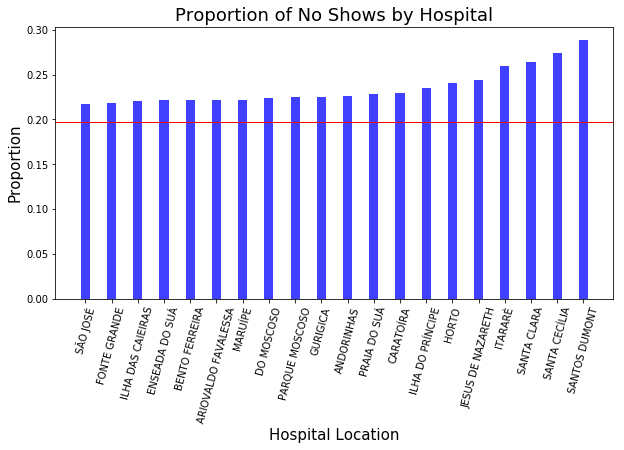

In [77]:
indexc = np.arange(len(high_proportion)) 
width = 0.35 
plt.figure(figsize=(10,5))
# plot bars
No_show_bar = plt.bar(indexc, high_proportion, width, color='b', alpha=.75, label='RCities')

labels = ['SÃO JOSÉ','FONTE GRANDE','ILHA DAS CAIEIRAS', 'ENSEADA DO SUÁ', 'BENTO FERREIRA','ARIOVALDO FAVALESSA', 
          'MARUÍPE','DO MOSCOSO','PARQUE MOSCOSO', 'GURIGICA', 'ANDORINHAS','PRAIA DO SUÁ', 'CARATOÍRA','ILHA DO PRÍNCIPE',
          'HORTO','JESUS DE NAZARETH','ITARARÉ','SANTA CLARA', 'SANTA CECÍLIA','SANTOS DUMONT']  # xtick labels
#title and labels
plt.ylabel('Proportion', fontsize=15)
plt.xlabel('Hospital Location', fontsize=15)
plt.title('Proportion of No Shows by Hospital', fontsize=18)
plt.xticks(indexc, labels, fontsize=10, rotation=75)
plt.axhline(hp_median, color='red', linestyle='-', linewidth=1);

## Notes
>The graph is skewed to the left, showing that there is a correlation with certain neighborhoods and higher rates of no shows. Further statisical modeling will need to be required to see why this is the cause. 

<a id='conclusions'></a>
## Conclusions

>First, I must make it clear that my analysis is limited and will need further statisical modeling for precision. 

>Second, there could be more variables that are not present that could be the causation of patient's being no shows to the hosptials. I was only able to find a correlation with hosptial locations.  

>Third, interrelationships between the variables have not been thoroughly investigated. 

>Lastly, I believe that transporation could be a factor as to why patient's are no shows to hosptials. I want to obtain data that includes modes of transporation that the population takes and the accessibility to them. 



In [82]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255